In [1]:
# -*- coding: utf-8
# VOLT DATA LAB (https://www.voltdata.info/)
# Reinaldo Chaves (@paidatocandeira)
# Programa que mostra como os deputados estaduais paulistas gastam sua verba de gabinete mensal
#

In [2]:
import json
import xmltodict
import pandas as pd
import numpy as np
import unidecode
import altair as alt

Função para retirar acentuação 

In [86]:
def f(str):
    return (unidecode.unidecode(str))

Formato do float

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Estudos sobre a verba de gabinete dos deputados estaduais da atual legislatura

Fonte
https://www.al.sp.gov.br/dados-abertos/recurso/21

Transforma arquivo XML em JSON 

In [5]:
with open("dados/deputados/despesas_gabinetes_julho_2018.xml", 'r') as f:
    xmlString = f.read()
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)
with open("output.json", 'w') as f:
    f.write(jsonString)

In [6]:
arquivo_json = open('output.json', 'r')

In [7]:
dados_json = json.load(arquivo_json)

Transforma JSON em dataframe

In [9]:
lista = dados_json['despesas']['despesa']

In [10]:
df_despesas = pd.DataFrame(lista, columns = ['Ano', 'CNPJ', 'Deputado', 'Fornecedor', 'Matricula', 'Mes', 'Tipo', 'Valor'])

In [11]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455156 entries, 0 to 455155
Data columns (total 8 columns):
Ano           455156 non-null object
CNPJ          445475 non-null object
Deputado      455156 non-null object
Fornecedor    455156 non-null object
Matricula     455156 non-null object
Mes           455156 non-null object
Tipo          455156 non-null object
Valor         455156 non-null object
dtypes: object(8)
memory usage: 27.8+ MB


Rotinas de limpeza

In [15]:
df_despesas['Valor'] = df_despesas.Valor.astype('float64')

In [16]:
df_despesas['CNPJ'] = df_despesas.CNPJ.astype('str')

In [17]:
def limpeza(linha):
    documento = linha["CNPJ"]
    if len(documento) > 11:
        return documento[:8]
    else:
        return "documento_cpf_"

Pega o CNPJ raiz do fornecedor ou aponta que é um CPF

In [18]:
df_despesas['cnpj_raiz_fornecedor'] = df_despesas.apply(limpeza, axis = 1)

In [19]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455156 entries, 0 to 455155
Data columns (total 9 columns):
Ano                     455156 non-null object
CNPJ                    455156 non-null object
Deputado                455156 non-null object
Fornecedor              455156 non-null object
Matricula               455156 non-null object
Mes                     455156 non-null object
Tipo                    455156 non-null object
Valor                   455156 non-null float64
cnpj_raiz_fornecedor    455156 non-null object
dtypes: float64(1), object(8)
memory usage: 31.3+ MB


In [20]:
df_despesas.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
0,0,2015,71806251000106,ABELARDO CAMARINHA,AUTO POSTO DE SERVIÇOS MARV LTDA,300257,3,A - COMBUSTÍVEIS E LUBRIFICANTES,200.00,71806251
1,1,2015,68064740000125,ABELARDO CAMARINHA,PAPER FACE COMERCIAL LTDA,300257,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,295.40,68064740
2,2,2015,22145388877,ABELARDO CAMARINHA,LARA SERVINO VARGAS ABREU,300257,3,N - MORADIA,"2,850.00",documento_cpf_
3,3,2015,10915883000113,ABELARDO CAMARINHA,CENTRO AUTOMOTIVO TOP 23 LTDA,300257,4,A - COMBUSTÍVEIS E LUBRIFICANTES,100.00,10915883
4,4,2015,71806251000106,ABELARDO CAMARINHA,AUTO POSTO DE SERVIÇOS MARV LTDA,300257,4,A - COMBUSTÍVEIS E LUBRIFICANTES,195.01,71806251


Soma histórico de despesas

In [21]:
df_despesas['Valor'].sum()

311900200.82000023

In [22]:
"${:,.2f}".format(df_despesas.Valor.sum())

'$311,900,200.82'

Soma por deputados o histórico

In [23]:
df_despesas.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Deputado,Valor
41,CAMPOS MACHADO,"4,066,365.58"
10,ALDO DEMARCHI,"3,801,287.66"
183,MARIA LÚCIA AMARY,"3,762,815.87"
5,AFONSO LOBATO,"3,727,427.14"
72,CÉLIA LEÃO,"3,675,538.21"
234,ROBERTO ENGLER,"3,668,365.75"
160,LUIZ CARLOS GONDIM,"3,668,202.46"
100,ENIO TATTO,"3,621,293.14"
20,ANALICE FERNANDES,"3,593,955.27"
17,ANA DO CARMO,"3,422,842.43"


Soma por fornecedor

In [24]:
df_despesas.groupby("Fornecedor").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Fornecedor,Valor
66100,TELEFONICA,"2,911,294.99"
66107,TELEFONICA BRASIL S.A.,"2,500,701.86"
47288,NEXTEL TELECOMUNICAÇÕES LTDA,"2,179,388.71"
66120,TELEFÔNICA BRASIL S.A.,"2,160,877.74"
66105,TELEFONICA BRASIL S.A,"1,597,810.51"
50926,PEDÁGIO,"1,322,905.88"
68997,VIVO S.A.,"1,255,101.17"
47289,NEXTEL TELECOMUNICAÇÕES LTDA.,"1,252,512.74"
66108,TELEFONICA BRASIL S/A,"1,219,905.04"
68988,VIVO,"1,089,259.35"


Tabela dinâmica por ano, deputado e cnpj raiz de fornecedor - caso necessário verificar

In [25]:
#pd.pivot_table(df_despesas,index=["Ano","Deputado", "cnpj_raiz_fornecedor"], values=["Valor"], aggfunc=np.sum)

In [21]:
df_despesas.to_csv('resultados/despesas_dep_est_sp_julho.csv', index=False, decimal=',')

# Carrega arquivo salvo

In [4]:
df_despesas = pd.read_csv("resultados/despesas_dep_est_sp_julho.csv", sep=',',encoding = 'utf-8', converters={'CNPJ': lambda x: str(x), 'cnpj_raiz_fornecedor': lambda x: str(x), 'Ano': lambda x: str(x)}, decimal=',')

In [5]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455156 entries, 0 to 455155
Data columns (total 9 columns):
Ano                     455156 non-null object
CNPJ                    455156 non-null object
Deputado                455156 non-null object
Fornecedor              455156 non-null object
Matricula               455156 non-null int64
Mes                     455156 non-null int64
Tipo                    455156 non-null object
Valor                   455156 non-null float64
cnpj_raiz_fornecedor    455156 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 31.3+ MB


Exemplo de procura por nome de fornecedor

In [26]:
mask = df_despesas['Fornecedor'].str.contains("ITORORO", na=False)
procura = df_despesas[mask]

In [27]:
procura.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
0,41,2015,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,9,A - COMBUSTÍVEIS E LUBRIFICANTES,56.28,61488904
1,42,2015,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,9,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"3,243.72",61488904
2,65,2016,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,3,A - COMBUSTÍVEIS E LUBRIFICANTES,210.00,61488904
3,66,2016,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,3,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"3,148.71",61488904
4,105,2016,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,8,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"2,454.56",61488904


Exemplo de procura por CNPJ raiz

In [28]:
nome = df_despesas[(df_despesas['cnpj_raiz_fornecedor'] == '19876022')]

In [29]:
nome.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
0,2636,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,10,K - LOCAÇÃO DE BENS MÓVEIS,"3,800.00",19876022
1,2639,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,10,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","3,500.00",19876022
2,2647,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,11,K - LOCAÇÃO DE BENS MÓVEIS,"3,800.00",19876022
3,2650,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,11,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","3,500.00",19876022
4,2659,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,12,K - LOCAÇÃO DE BENS MÓVEIS,"3,800.00",19876022


Exemplo de uma despesa na qual o CNPJ é um CPF de deputado

In [30]:
nome = df_despesas[(df_despesas['CNPJ'] == '02674980800')]
nome

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
372417,2017,02674980800,ROBERTO MASSAFERA,CIRO BERBES JUNIOR,300478,8,N - MORADIA,"2,500.00",documento_cpf_


Separa lote para checar em https://www.al.sp.gov.br/deputados/prestacao-de-contas/

In [74]:
despesa_selecionada = df_despesas[(df_despesas['Deputado'] == 'CAUÊ MACRIS') & 
                              (df_despesas['Ano'] == '2016') & 
                              (df_despesas['Mes'] == '11') & 
                              (df_despesas['Tipo'] == 'K - LOCAÇÃO DE BENS MÓVEIS')]

In [75]:
despesa_selecionada.Valor.sum()

2722.7

In [76]:
"${:,.0f}".format(despesa_selecionada.Valor.sum())

'$2,723'

In [77]:
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
93233,2016,06291703000100,CAUÊ MACRIS,COLORTEC COMÉRCIO LOCAÇÃO E ASSISTÊNCIA TÉCNIC...,300503,11,K - LOCAÇÃO DE BENS MÓVEIS,422.20,06291703
93234,2016,08570955000196,CAUÊ MACRIS,JOSE APARECIDO DE SOUZA INFORMÁTICA,300503,11,K - LOCAÇÃO DE BENS MÓVEIS,"2,150.00",08570955
93235,2016,40432544000147,CAUÊ MACRIS,CLARO S/A,300503,11,K - LOCAÇÃO DE BENS MÓVEIS,150.50,40432544


# Seleciona despesas da atual legislatura

In [78]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455156 entries, 0 to 455155
Data columns (total 9 columns):
Ano                     455156 non-null object
CNPJ                    455156 non-null object
Deputado                455156 non-null object
Fornecedor              455156 non-null object
Matricula               455156 non-null object
Mes                     455156 non-null object
Tipo                    455156 non-null object
Valor                   455156 non-null float64
cnpj_raiz_fornecedor    455156 non-null object
dtypes: float64(1), object(8)
memory usage: 31.3+ MB


In [81]:
despesas_atuais = df_despesas[(df_despesas['Ano'] == '2015') | 
                              (df_despesas['Ano'] == '2016') | 
                              (df_despesas['Ano'] == '2017') | 
                              (df_despesas['Ano'] == '2018')].copy()

In [84]:
despesas_atuais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82823 entries, 0 to 452412
Data columns (total 9 columns):
Ano                     82823 non-null object
CNPJ                    82823 non-null object
Deputado                82823 non-null object
Fornecedor              82823 non-null object
Matricula               82823 non-null object
Mes                     82823 non-null object
Tipo                    82823 non-null object
Valor                   82823 non-null float64
cnpj_raiz_fornecedor    82823 non-null object
dtypes: float64(1), object(8)
memory usage: 6.3+ MB


In [87]:
despesas_atuais["Deputado"] = despesas_atuais["Deputado"].apply(f)

In [11]:
despesas_atuais.to_excel('resultados/despesas_atuais.xlsx',sheet_name='Sheet1')

Quantidade de deputados com gastos

In [89]:
a = len(despesas_atuais['Deputado'].value_counts())
a

136

Exemplo de deputado da legislatura passada que registrou algumas despesas em 2015

In [90]:
nome = despesas_atuais[(despesas_atuais['Deputado'] == 'BRUNO COVAS')]
nome

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
66361,2015,02928132000103,BRUNO COVAS,CENTRO DE SERVIÇOS FRANGO ASSADO SULESTE LTDA,300481,1,A - COMBUSTÍVEIS E LUBRIFICANTES,123.13,02928132
66362,2015,10318092000106,BRUNO COVAS,AUTO POSTO DUQUE SUECIA LTDA.,300481,1,A - COMBUSTÍVEIS E LUBRIFICANTES,115.07,10318092
66363,2015,10559732000170,BRUNO COVAS,AUTO POSTO NAUTICA FREI GASPAR LTDA-ME,300481,1,A - COMBUSTÍVEIS E LUBRIFICANTES,128.17,10559732
66364,2015,43283811001474,BRUNO COVAS,KALUNGA COMERCIO INDUSTRIA GRAFICA LTDA,300481,1,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,48.20,43283811
66365,2015,40432544000147,BRUNO COVAS,CLARO CLUBE,300481,1,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...",735.32,40432544
66366,2015,02575829000148,BRUNO COVAS,AVIANCA,300481,1,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...","1,660.00",02575829
66367,2015,nan,BRUNO COVAS,TAXI,300481,1,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",220.00,documento_cpf_
66368,2015,05742944000158,BRUNO COVAS,MIRAGE EMPREENDIMENTOS E PARTICIPAÇÕES LTDA,300481,1,N - MORADIA,"2,850.00",05742944


## Separa nomes de deputados que têm gastos na atual legislatura para criar um dataframe base de nomes que será finalizado em alesp_unificacodigos

In [47]:
nomes = despesas_atuais['Deputado'].value_counts()

nomes_deputados_atual_legislatura = pd.DataFrame({'Deputado':nomes.index, 'list':nomes.values})

nomes_deputados_atual_legislatura = nomes_deputados_atual_legislatura.drop('list', axis=1)

nomes_deputados_atual_legislatura.info()

nomes_deputados_atual_legislatura.to_csv("resultados/nomes_deputados_atual_legislatura.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 1 columns):
Deputado    136 non-null object
dtypes: object(1)
memory usage: 1.1+ KB


### Carrega nomes de deputados da atual legislatura - gerados no alesp_unificacodigos

In [92]:
nomes_deputados_atual_legislatura = pd.read_csv('resultados/deputados_selecionados_final.csv', converters={'sequencial': lambda x: str(x), 'cpf': lambda x: str(x), 'codigo_unico': lambda x: str(x) })

In [93]:
nomes_deputados_atual_legislatura["nome_deputado"] = nomes_deputados_atual_legislatura["nome_deputado"].apply(f)

In [94]:
nomes_deputados_atual_legislatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
codigo_unico       120 non-null object
nome_deputado      120 non-null object
uf                 120 non-null object
nome_completo      120 non-null object
sequencial         120 non-null object
cpf                120 non-null object
nome_urna          120 non-null object
partido_eleicao    120 non-null object
situacao           120 non-null object
dtypes: object(9)
memory usage: 8.5+ KB


In [95]:
a = len(nomes_deputados_atual_legislatura['nome_deputado'].value_counts())
a

120

Filtra por esses nomes

In [96]:
despesas_atuais_final = pd.merge(despesas_atuais, nomes_deputados_atual_legislatura, left_on='Deputado', right_on='nome_urna')

In [97]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82318 entries, 0 to 82317
Data columns (total 18 columns):
Ano                     82318 non-null object
CNPJ                    82318 non-null object
Deputado                82318 non-null object
Fornecedor              82318 non-null object
Matricula               82318 non-null object
Mes                     82318 non-null object
Tipo                    82318 non-null object
Valor                   82318 non-null float64
cnpj_raiz_fornecedor    82318 non-null object
codigo_unico            82318 non-null object
nome_deputado           82318 non-null object
uf                      82318 non-null object
nome_completo           82318 non-null object
sequencial              82318 non-null object
cpf                     82318 non-null object
nome_urna               82318 non-null object
partido_eleicao         82318 non-null object
situacao                82318 non-null object
dtypes: float64(1), object(17)
memory usage: 11.9+ MB


In [98]:
a = len(despesas_atuais_final['Deputado'].value_counts())
a

120

In [35]:
despesas_atuais_final.to_csv('resultados/despesas_atuais_final.csv', index=False, decimal=',')

In [50]:
despesas_atuais_final.to_excel('resultados/despesas_atuais_final.xlsx',sheet_name='Sheet1', index=False)

In [36]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82318 entries, 0 to 82317
Data columns (total 18 columns):
Ano                     82318 non-null object
CNPJ                    82318 non-null object
Deputado                82318 non-null object
Fornecedor              82318 non-null object
Matricula               82318 non-null object
Mes                     82318 non-null object
Tipo                    82318 non-null object
Valor                   82318 non-null float64
cnpj_raiz_fornecedor    82318 non-null object
codigo_unico            82318 non-null object
nome_deputado           82318 non-null object
uf                      82318 non-null object
nome_completo           82318 non-null object
sequencial              82318 non-null object
cpf                     82318 non-null object
nome_urna               82318 non-null object
partido_eleicao         82318 non-null object
situacao                82318 non-null object
dtypes: float64(1), object(17)
memory usage: 11.9+ MB


In [39]:
despesas_atuais_final = pd.read_csv('resultados/despesas_atuais_final.csv', converters={'CNPJ': lambda x: str(x), 
                                                                                        'cnpj_raiz_fornecedor': lambda x: str(x), 
                                                                                        'codigo_unico': lambda x: str(x), 
                                                                                        'sequencial': lambda x: str(x), 
                                                                                        'Ano': lambda x: str(x), 
                                                                                        'Mes': lambda x: str(x), 
                                                                                        'cpf': lambda x: str(x) })

Checa alguns nomes

In [99]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'ADILSON ROSSI') & 
                              (despesas_atuais_final['Ano'] == '2015') & 
                              (despesas_atuais_final['Mes'] == 10) & 
                              (despesas_atuais_final['Tipo'] == 'K - LOCAÇÃO DE BENS MÓVEIS')]

In [100]:
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao


In [101]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'GIL LANCASTER') & 
                              (despesas_atuais_final['Ano'] == '2018') & 
                              (despesas_atuais_final['Mes'] == '3') & 
                              (despesas_atuais_final['Tipo'] == 'E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO')]
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
35656,2018,07686203000122,GIL LANCASTER,CRIDON COMERCIAL LTDA EPP,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,32.00,07686203,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
35657,2018,15359521000107,GIL LANCASTER,O MUNDO DAS EMBALAGENS LTDA - EPP,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,147.20,15359521,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
35658,2018,24422336000100,GIL LANCASTER,EDINAURA BATISTA FIGUEIREDO SILVA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,80.16,24422336,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
35659,2018,33014556035577,GIL LANCASTER,LOJAS AMERICANAS S/A,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,59.97,33014556,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
35660,2018,43283811002608,GIL LANCASTER,KALUNGA COMERCIO E IND. GRÁFICA LTDA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,375.35,43283811,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
35661,2018,43283811004066,GIL LANCASTER,KALUNGA COMERCIO E IND.GRAFICA LTDA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,126.60,43283811,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
35662,2018,60437647001936,GIL LANCASTER,SILVA E BARBOSA COMERCIO DE ALIMENTOS LTDA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,247.28,60437647,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP


In [102]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'FERNANDO CAPEZ') & 
                              (despesas_atuais_final['Ano'] == '2016') & 
                              (despesas_atuais_final['Mes'] == '2') & 
                              (despesas_atuais_final['Tipo'] == 'J - SERVIÇOS DE COMUNICAÇÃO')]
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
32824,2016,67641886000123,FERNANDO CAPEZ,ECT - EMP. BRAS. CORREIOS E TELEGRAFOS,300459,2,J - SERVIÇOS DE COMUNICAÇÃO,2.10,67641886,10600,FERNANDO CAPEZ,SP,FERNANDO CAPEZ,250000001510,08238377854,FERNANDO CAPEZ,PSDB,ELEITO POR QP


Verifica se algum nome não foi encontrado

In [103]:
nomes_naoencontrados = pd.merge(despesas_atuais, 
                        nomes_deputados_atual_legislatura, 
                        left_on='Deputado', 
                        right_on='nome_urna',
                        how='outer',
                        indicator=True)

rdf = nomes_naoencontrados.query("_merge == 'right_only'").drop('_merge',axis=1)

In [104]:
rdf.nome_urna

Series([], Name: nome_urna, dtype: object)

Quantidade geral de despesas

In [45]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82318 entries, 0 to 82317
Data columns (total 18 columns):
Ano                     82318 non-null object
CNPJ                    82318 non-null object
Deputado                82318 non-null object
Fornecedor              82318 non-null object
Matricula               82318 non-null int64
Mes                     82318 non-null object
Tipo                    82318 non-null object
Valor                   82318 non-null object
cnpj_raiz_fornecedor    82318 non-null object
codigo_unico            82318 non-null object
nome_deputado           82318 non-null object
uf                      82318 non-null object
nome_completo           82318 non-null object
sequencial              82318 non-null object
cpf                     82318 non-null object
nome_urna               82318 non-null object
partido_eleicao         82318 non-null object
situacao                82318 non-null object
dtypes: int64(1), object(17)
memory usage: 11.3+ MB


Quantidade deputados

In [105]:
a = len(despesas_atuais_final['Deputado'].value_counts())
a

120

Nomes de deputados que tiveram despesas de gabinete na atual legislatura, em quantidade

In [106]:
despesas_atuais_final['Deputado'].value_counts()

MARCIA LIA               2736
WELSON GASPARINI         2523
REINALDO ALGUZ           2223
ANDRE SOARES             1971
SEBASTIAO SANTOS         1942
JOOJI HATO               1907
DAVI ZAIA                1740
LUIZ CARLOS GONDIM       1693
MARIA LUCIA AMARY        1669
RITA PASSOS              1633
PEDRO TOBIAS             1549
CARLOS NEDER             1539
EDSON GIRIBONI           1471
RODRIGO MORAES           1420
BARROS MUNHOZ            1390
HELIO NISHIMOTO          1365
CAUE MACRIS              1336
FERNANDO CURY            1232
LUIZ FERNANDO            1224
CORONEL TELHADA          1223
RAFAEL SILVA             1174
ANDRE DO PRADO           1151
CHICO SARDELLI           1129
ROQUE BARBIERE           1094
CELSO NASCIMENTO         1083
CLELIA GOMES             1072
FELICIANO FILHO          1020
ANALICE FERNANDES        1008
RICARDO MADALENA         1003
ROBERTO TRIPOLI           983
                         ... 
ATILA JACOMUSSI           249
JOSE ZICO PRADO           242
ANA DO CAR

# Análises das despesas da atual legislatura

Soma das despesas

In [107]:
despesas_atuais_final['Valor'].sum()

76604897.65

In [108]:
"${:,.2f}".format(despesas_atuais_final.Valor.sum())

'$76,604,897.65'

Média

In [109]:
despesas_atuais_final['Valor'].mean()

930.597167691149

In [110]:
"${:,.0f}".format(despesas_atuais_final.Valor.mean())

'$931'

Mediana

In [111]:
despesas_atuais_final['Valor'].median()

210.0

In [112]:
"${:,.0f}".format(despesas_atuais_final.Valor.median())

'$210'

Maiores despesas

In [113]:
despesas_atuais_final.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False).head(10)

,Deputado,Valor
60,ITAMAR BORGES,"1,225,322.51"
21,CARLAO PIGNATARI,"1,205,708.42"
20,CAMPOS MACHADO,"1,155,406.50"
5,ALENCAR SANTANA BRAGA,"1,149,436.08"
47,FELICIANO FILHO,"1,134,941.68"
100,REINALDO ALGUZ,"1,132,046.81"
104,ROBERTO MASSAFERA,"1,126,564.44"
37,DAVI ZAIA,"1,113,835.46"
86,MARTA COSTA,"1,105,426.83"
113,TEONILIO BARBA,"1,099,334.21"


In [25]:
gasto_geral = despesas_atuais_final.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False)
gasto_geral.to_excel('resultados/gasto_geraldeputados.xlsx',sheet_name='Sheet1')

Porcentagens

In [114]:
# Agrupamento dos gastos por categoria
nomes_dep = despesas_atuais_final.groupby(['Deputado']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
nomes_dep['porcentagem'] = (nomes_dep['Valor'] / nomes_dep['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
nomes_dep['Valor'] = nomes_dep['Valor'].map('{:,.2f}'.format)
nomes_dep['porcentagem'] = nomes_dep['porcentagem'].map('{:,.2f}'.format)

# Resultado
nomes_dep.reset_index().head(10)

,index,Deputado,Valor,porcentagem
0,0,ITAMAR BORGES,"1,225,322.51",1.60
1,1,CARLAO PIGNATARI,"1,205,708.42",1.57
2,2,CAMPOS MACHADO,"1,155,406.50",1.51
3,3,ALENCAR SANTANA BRAGA,"1,149,436.08",1.50
4,4,FELICIANO FILHO,"1,134,941.68",1.48
5,5,REINALDO ALGUZ,"1,132,046.81",1.48
6,6,ROBERTO MASSAFERA,"1,126,564.44",1.47
7,7,DAVI ZAIA,"1,113,835.46",1.45
8,8,MARTA COSTA,"1,105,426.83",1.44
9,9,TEONILIO BARBA,"1,099,334.21",1.44


In [115]:
nomes_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
Deputado       120 non-null object
Valor          120 non-null object
porcentagem    120 non-null object
dtypes: object(3)
memory usage: 2.9+ KB


In [116]:
nomes_dep['porcentagem'] = nomes_dep.porcentagem.astype('float64')

In [117]:
nomes_dep.head()

,Deputado,Valor,porcentagem
0,ITAMAR BORGES,"1,225,322.51",1.60
1,CARLAO PIGNATARI,"1,205,708.42",1.57
2,CAMPOS MACHADO,"1,155,406.50",1.51
3,ALENCAR SANTANA BRAGA,"1,149,436.08",1.50
4,FELICIANO FILHO,"1,134,941.68",1.48


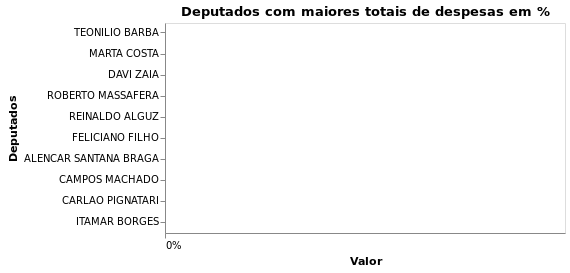

In [118]:
alt.Chart(nomes_dep.reset_index().head(10), title="Deputados com maiores totais de despesas em %").mark_bar().encode(
    x=alt.X("Valor:Q", axis=alt.Axis(title="Valor", format='.0%')),
    y=alt.Y(
        "Deputado:N",
        sort=alt.SortField(field="Valor", op="sum", order="descending"),
        axis=alt.Axis(title="Deputados")
    )
)

Maior despesa individual

In [119]:
despesas_atuais_final[despesas_atuais_final['Valor']== despesas_atuais_final['Valor'].max()]

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
77780,2017,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,8,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77806,2017,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,9,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77832,2017,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,10,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77853,2017,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,11,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77876,2017,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,12,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77899,2018,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,1,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77925,2018,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,2,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77955,2018,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,3,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
77997,2018,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,4,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP
78025,2018,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,5,L - LOCAÇÃO DE BENS IMÓVEIS,"9,334.61",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP


Média por ano 

In [120]:
despesas_atuais_final.groupby('Ano').mean()['Valor']

Ano
2015   894.44
2016   946.35
2017   943.16
2018   942.49
Name: Valor, dtype: float64

Verifica nomes

In [122]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'CARLOS GIANNAZI')]

In [123]:
despesa_selecionada.groupby("Tipo").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Tipo,Valor
2,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","179,273.54"
8,L - LOCAÇÃO DE BENS IMÓVEIS,"118,848.33"
5,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...","96,099.57"
1,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"38,083.69"
3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,"7,480.98"
6,J - SERVIÇOS DE COMUNICAÇÃO,"7,268.34"
0,A - COMBUSTÍVEIS E LUBRIFICANTES,"4,951.97"
7,K - LOCAÇÃO DE BENS MÓVEIS,648.18
4,"G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES E I...",643.36


Quantidade de tipos de despesas

In [124]:
despesas_atuais_final['Tipo'].nunique()

13

Quantidade de despesas por Tipo

In [125]:
despesas_atuais_final['Tipo'].value_counts()

A - COMBUSTÍVEIS E LUBRIFICANTES                                      21613
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                   12288
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)      10245
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              8650
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          6456
G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES E INTERNET                  4880
L - LOCAÇÃO DE BENS IMÓVEIS                                            4249
K - LOCAÇÃO DE BENS MÓVEIS                                             3638
C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS     3152
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     2881
J - SERVIÇOS DE COMUNICAÇÃO                                            2115
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       1433
N - MORADIA                                                             718
Name: Tipo, 

Gastos por tipo de despesa

In [126]:
despesas_atuais_final.groupby("Tipo").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Tipo,Valor
2,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","15,725,776.95"
10,L - LOCAÇÃO DE BENS IMÓVEIS,"14,645,345.81"
0,A - COMBUSTÍVEIS E LUBRIFICANTES,"6,937,826.04"
6,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...","6,600,684.29"
11,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","5,739,873.32"
4,F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTOR...,"5,559,426.54"
9,K - LOCAÇÃO DE BENS MÓVEIS,"4,850,549.96"
3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,"4,704,146.43"
8,J - SERVIÇOS DE COMUNICAÇÃO,"3,875,613.52"
1,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"2,884,602.24"


Porcentagens por tipo de despesa

In [127]:
# Agrupamento dos gastos por categoria
df_tipo = despesas_atuais_final.groupby(['Tipo']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
df_tipo['porcentagem'] = (df_tipo['Valor'] / df_tipo['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_tipo['Valor'] = df_tipo['Valor'].map('{:,.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{:,.2f}'.format)

# Resultado
df_tipo.reset_index() 

,index,Tipo,Valor,porcentagem
0,0,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","15,725,776.95",20.53
1,1,L - LOCAÇÃO DE BENS IMÓVEIS,"14,645,345.81",19.12
2,2,A - COMBUSTÍVEIS E LUBRIFICANTES,"6,937,826.04",9.06
3,3,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...","6,600,684.29",8.62
4,4,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","5,739,873.32",7.49
5,5,F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTOR...,"5,559,426.54",7.26
6,6,K - LOCAÇÃO DE BENS MÓVEIS,"4,850,549.96",6.33
7,7,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,"4,704,146.43",6.14
8,8,J - SERVIÇOS DE COMUNICAÇÃO,"3,875,613.52",5.06
9,9,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"2,884,602.24",3.77


Mais gastos em quatidade em tipo D por deputado

In [128]:
despesas_atuais_final[despesas_atuais_final['Tipo']=='D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS']['Deputado'].value_counts().head(10)

CARLAO PIGNATARI         68
WELSON GASPARINI         63
ROBERTO ENGLER           59
MILTON VIEIRA            55
GIL LANCASTER            55
ALENCAR SANTANA BRAGA    54
EDSON GIRIBONI           49
CARLOS NEDER             49
ROBERTO MORAIS           47
ANALICE FERNANDES        46
Name: Deputado, dtype: int64

Maiores gastos em valor em tipo D por deputado

In [129]:
graficas = despesas_atuais_final[(despesas_atuais_final['Tipo'] == 'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS')]

In [130]:
graficas.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False).head(10)

,Deputado,Valor
8,ANA DO CARMO,"327,000.00"
108,SEBASTIAO SANTOS,"322,703.66"
100,ROBERTO ENGLER,"319,533.00"
17,BETH SAHAO,"319,350.00"
86,MILTON VIEIRA,"312,006.75"
105,ROGERIO NOGUEIRA,"312,000.00"
68,LECI BRANDAO,"308,715.00"
44,ENIO TATTO,"303,420.00"
101,ROBERTO MASSAFERA,"302,800.00"
95,RAMALHO DA CONSTRUCAO,"301,030.00"


Porcentagens por tipo de despesa de gráficas 

In [131]:
# Agrupamento dos gastos por nomes
nomes_graficas = graficas.groupby(['Deputado']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
nomes_graficas['porcentagem'] = (nomes_graficas['Valor'] / nomes_graficas['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
nomes_graficas['Valor'] = nomes_graficas['Valor'].map('{:,.2f}'.format)
nomes_graficas['porcentagem'] = nomes_graficas['porcentagem'].map('{:,.2f}'.format)

# Resultado
nomes_graficas.reset_index().head(10)

,index,Deputado,Valor,porcentagem
0,0,ANA DO CARMO,"327,000.00",2.08
1,1,SEBASTIAO SANTOS,"322,703.66",2.05
2,2,ROBERTO ENGLER,"319,533.00",2.03
3,3,BETH SAHAO,"319,350.00",2.03
4,4,MILTON VIEIRA,"312,006.75",1.98
5,5,ROGERIO NOGUEIRA,"312,000.00",1.98
6,6,LECI BRANDAO,"308,715.00",1.96
7,7,ENIO TATTO,"303,420.00",1.93
8,8,ROBERTO MASSAFERA,"302,800.00",1.93
9,9,RAMALHO DA CONSTRUCAO,"301,030.00",1.91


Graficas usadas por ANA do CARMO

In [132]:
ana_grafica = graficas[(graficas['Deputado'] == 'ANA DO CARMO')]

In [133]:
ana_grafica.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
0,3014,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,1,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
1,3017,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,2,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
2,3022,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,3,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
3,3025,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,4,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
4,3031,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,5,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP


AGB PACK COMERCIO DE EMBALAGENS E SERVICOS
VIVIANE DE CASSIA FERREIRA 
R VISCONDE DE PARNAIBA S/N - SAO PAULO - SP

ANNA GIULIA CARMO BUSCATTI
EPP
R MADRE DE DEUS 1285 APT 101 - SAO PAULO - SP

Mais gastos em quatidade em tipo L por deputado

In [134]:
despesas_atuais_final[despesas_atuais_final['Tipo']=='L - LOCAÇÃO DE BENS IMÓVEIS']['Deputado'].value_counts().head(10)

CAMPOS MACHADO           181
ROBERTO MASSAFERA        123
FERNANDO CURY            116
WELLINGTON MOURA         105
MARTA COSTA              103
ALENCAR SANTANA BRAGA     95
BARROS MUNHOZ             92
ENIO TATTO                89
GILENO GOMES              86
SEBASTIAO SANTOS          82
Name: Deputado, dtype: int64

Maiores gastos em valor em tipo L por deputado

In [135]:
locacao_imoveis = despesas_atuais_final[(despesas_atuais_final['Tipo'] == 'L - LOCAÇÃO DE BENS IMÓVEIS')] 

In [136]:
locacao_imoveis.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False).head(10)

,Deputado,Valor
17,CAMPOS MACHADO,"682,636.44"
25,CELINO CARDOSO,"419,093.87"
97,WELLINGTON MOURA,"386,898.50"
2,ALDO DEMARCHI,"350,637.95"
6,ANA DO CARMO,"334,539.24"
42,FERNANDO CAPEZ,"324,797.42"
3,ALENCAR SANTANA BRAGA,"311,366.44"
43,FERNANDO CURY,"308,000.00"
9,ANDRE SOARES,"300,477.44"
33,DAVI ZAIA,"287,032.10"


Porcentagens

In [137]:
# Agrupamento dos gastos por nomes
imoveis = locacao_imoveis.groupby(['Deputado']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
imoveis['porcentagem'] = (imoveis['Valor'] / imoveis['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
imoveis['Valor'] = imoveis['Valor'].map('{:,.2f}'.format)
imoveis['porcentagem'] = imoveis['porcentagem'].map('{:,.2f}'.format)

# Resultado
imoveis.reset_index().head(10)

,index,Deputado,Valor,porcentagem
0,0,CAMPOS MACHADO,"682,636.44",4.66
1,1,CELINO CARDOSO,"419,093.87",2.86
2,2,WELLINGTON MOURA,"386,898.50",2.64
3,3,ALDO DEMARCHI,"350,637.95",2.39
4,4,ANA DO CARMO,"334,539.24",2.28
5,5,FERNANDO CAPEZ,"324,797.42",2.22
6,6,ALENCAR SANTANA BRAGA,"311,366.44",2.13
7,7,FERNANDO CURY,"308,000.00",2.10
8,8,ANDRE SOARES,"300,477.44",2.05
9,9,DAVI ZAIA,"287,032.10",1.96


Imoveis usados por CAMPOS MACHADO

In [138]:
imoveis_campos = locacao_imoveis[(locacao_imoveis['Deputado'] == 'CAMPOS MACHADO')]

In [139]:
imoveis_campos.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
0,10969,2015,07813996000101,CAMPOS MACHADO,CMV AUTOMAÇÃO S/A,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"6,800.00",07813996,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
1,10970,2015,13033477844,CAMPOS MACHADO,CLAUDIA SALLUM YAZBEK,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"1,400.00",documento_cpf_,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
2,10971,2015,15195476845,CAMPOS MACHADO,IVETE ABBUD DIB,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"3,400.00",documento_cpf_,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
3,10972,2015,15306494803,CAMPOS MACHADO,CLARICE ABBUD GABRIEL,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"3,400.00",documento_cpf_,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
4,10980,2015,07813996000101,CAMPOS MACHADO,CMV AUTOMAÇÃO S/A,300217,2,L - LOCAÇÃO DE BENS IMÓVEIS,"6,800.00",07813996,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP


+ CMV AUTOMACAO S/A.
R CONSELHEIRO ZACARIAS, 201
VICTOR NACIM ABBUD 
GUILNAR ATALLAH ABBUD

+ CLAUDIA SALLUM YAZBEK

+ IVETE ABBUD DIB

+ CLARICE ABBUD GABRIEL

+ NORMA ABBUD SALLUM

Pega CPF de deputados e cruza com despesas - para saber se há fornecedores com CPF de deputados

In [140]:
nomes_deputados_atual_legislatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
codigo_unico       120 non-null object
nome_deputado      120 non-null object
uf                 120 non-null object
nome_completo      120 non-null object
sequencial         120 non-null object
cpf                120 non-null object
nome_urna          120 non-null object
partido_eleicao    120 non-null object
situacao           120 non-null object
dtypes: object(9)
memory usage: 8.5+ KB


In [141]:
despesas_deputados_cpf = pd.merge(nomes_deputados_atual_legislatura, despesas_atuais_final, left_on='cpf', right_on='CNPJ')

In [142]:
despesas_deputados_cpf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 27 columns):
codigo_unico_x          7 non-null object
nome_deputado_x         7 non-null object
uf_x                    7 non-null object
nome_completo_x         7 non-null object
sequencial_x            7 non-null object
cpf_x                   7 non-null object
nome_urna_x             7 non-null object
partido_eleicao_x       7 non-null object
situacao_x              7 non-null object
Ano                     7 non-null object
CNPJ                    7 non-null object
Deputado                7 non-null object
Fornecedor              7 non-null object
Matricula               7 non-null object
Mes                     7 non-null object
Tipo                    7 non-null object
Valor                   7 non-null float64
cnpj_raiz_fornecedor    7 non-null object
codigo_unico_y          7 non-null object
nome_deputado_y         7 non-null object
uf_y                    7 non-null object
nome_completo_y 

In [143]:
despesas_deputados_cpf[['nome_urna_x','cpf_x','Fornecedor','Mes', 'Ano', 'Valor']]

,nome_urna_x,cpf_x,Fornecedor,Mes,Ano,Valor
0,ROBERTO MASSAFERA,02674980800,CIRO BERBES JUNIOR,8,2017,"2,500.00"
1,DOUTOR ULYSSES,01788949820,ULYSSES MARIO TASSINARI,10,2017,"3,656.91"
2,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,4,2015,"5,800.00"
3,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,7,2015,"5,800.00"
4,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,7,2015,46.45
5,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,1,2016,"5,800.00"
6,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,1,2016,46.45


In [144]:
pd.pivot_table(despesas_atuais_final,index=["Deputado"], values=["Valor"], aggfunc=np.sum)

,Valor
Deputado,
ABELARDO CAMARINHA,"972,302.44"
ADILSON ROSSI,"845,792.45"
AFONSO LOBATO,"1,058,703.04"
AIRTON GARCIA,"45,055.20"
ALDO DEMARCHI,"926,006.99"
ALENCAR SANTANA BRAGA,"1,149,436.08"
ALEXANDRE DA FARMACIA,"64,330.55"
ALEXANDRE PEREIRA,"87,212.92"
ANA DO CARMO,"902,716.98"


In [145]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82318 entries, 0 to 82317
Data columns (total 18 columns):
Ano                     82318 non-null object
CNPJ                    82318 non-null object
Deputado                82318 non-null object
Fornecedor              82318 non-null object
Matricula               82318 non-null object
Mes                     82318 non-null object
Tipo                    82318 non-null object
Valor                   82318 non-null float64
cnpj_raiz_fornecedor    82318 non-null object
codigo_unico            82318 non-null object
nome_deputado           82318 non-null object
uf                      82318 non-null object
nome_completo           82318 non-null object
sequencial              82318 non-null object
cpf                     82318 non-null object
nome_urna               82318 non-null object
partido_eleicao         82318 non-null object
situacao                82318 non-null object
dtypes: float64(1), object(17)
memory usage: 11.9+ MB


In [146]:
gasto_mensal = pd.pivot_table(despesas_atuais_final,index=["nome_deputado","Ano", "Mes"], values=["Valor"], aggfunc=np.sum).reset_index()

In [147]:
gasto_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3874 entries, 0 to 3873
Data columns (total 4 columns):
nome_deputado    3874 non-null object
Ano              3874 non-null object
Mes              3874 non-null object
Valor            3874 non-null float64
dtypes: float64(1), object(3)
memory usage: 121.1+ KB


In [148]:
gasto_mensal.head(10)

,nome_deputado,Ano,Mes,Valor
0,ABELARDO CAMARINHA,2015,10,"24,117.43"
1,ABELARDO CAMARINHA,2015,11,"20,984.07"
2,ABELARDO CAMARINHA,2015,3,"3,345.40"
3,ABELARDO CAMARINHA,2015,4,"4,843.97"
4,ABELARDO CAMARINHA,2015,5,"15,738.48"
5,ABELARDO CAMARINHA,2015,6,"18,245.08"
6,ABELARDO CAMARINHA,2015,7,"23,953.70"
7,ABELARDO CAMARINHA,2015,8,"27,587.43"
8,ABELARDO CAMARINHA,2015,9,"27,058.59"
9,ABELARDO CAMARINHA,2016,10,"27,676.30"


# Verifica deputados com gastos acima do teto mensal (R$ 31337.50) em 2018

In [149]:
acima_teto = gasto_mensal[(gasto_mensal['Ano'] == '2018') & 
                          (gasto_mensal['Valor'] > 31337.50)]

In [150]:
acima_teto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 32 to 3721
Data columns (total 4 columns):
nome_deputado    47 non-null object
Ano              47 non-null object
Mes              47 non-null object
Valor            47 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [151]:
a = len(acima_teto['nome_deputado'].value_counts())
a

22

In [152]:
acima_teto

,nome_deputado,Ano,Mes,Valor
32,ABELARDO CAMARINHA,2018,1,"31,945.00"
33,ABELARDO CAMARINHA,2018,2,"31,945.00"
34,ABELARDO CAMARINHA,2018,3,"31,945.00"
35,ABELARDO CAMARINHA,2018,4,"31,845.00"
119,AFONSO LOBATO,2018,4,"35,038.44"
542,BETH SAHAO,2018,2,"33,580.63"
543,BETH SAHAO,2018,3,"35,148.65"
545,BETH SAHAO,2018,5,"32,338.45"
587,CAIO FRANCA,2018,4,"31,617.98"
629,CAMPOS MACHADO,2018,4,"32,857.54"
